# Calculadora de Commodity Terms of Trade (CTOT) - WP/19/21

## 📋 Descripción General

Esta implementación replica la metodología del paper **"Commodity Terms of Trade: A New Database" (WP/19/21)** del FMI para calcular índices de términos de intercambio de commodities específicos por país.

El índice CTOT mide las **ganancias y pérdidas de ingreso** que experimenta un país debido a cambios en los precios internacionales de commodities, expresado como porcentaje del PIB.

## 🎯 Objetivo Principal

**Calcular el índice mensual CTOT para Brasil** usando:
- ✅ Precios reales de commodities (deflactados por CPI G7)
- ✅ Pesos time-varying basados en datos de comercio bilateral
- ✅ Metodología exacta del paper WP/19/21

## 📊 Fórmula Principal

```
ΔLog(CTOT_t) = Σ ΔP_j,t × Ω_i,j,t
```

Donde:
- `ΔP_j,t` = Cambio logarítmico del precio real del commodity j
- `Ω_i,j,t` = Peso del commodity j para el país i en el período t
- `Ω_i,j,t = (Exportaciones_j - Importaciones_j) / PIB`

## 🏗️ Arquitectura del Código

### Clase Principal: `MonthlyWP1921_CTOT_Calculator`

```python
class MonthlyWP1921_CTOT_Calculator:
    """
    Calculadora CTOT mensual basada en metodología WP/19/21
    """
```

---

## 🔧 Componentes Principales

### 1. **Mapeo de Commodities**
```python
self.commodity_mapping = {
    'PCOAL': ['270111', '270112', ...],    # Carbón
    'POILAPSP': ['270900', ...],           # Petróleo crudo
    'PCOPP': ['260300', '740100', ...],    # Cobre
    # ... 45+ commodities mapeados a códigos HS
}
```

**Propósito**: Conecta precios IMF con códigos de comercio internacional (HS)

### 2. **Carga de Precios con Deflactor**
```python
def load_imf_prices(self, file_path, cpi_deflator=None):
    """
    Carga precios nominales IMF y los convierte a reales
    Real Price = Nominal Price / CPI_G7
    """
```

**Inputs**: 
- Archivo Excel con precios mensuales IMF
- CPI G7 como deflactor (base 2016=100)

**Output**: DataFrame con precios reales mensuales

### 3. **Procesamiento de Datos de Comercio**
```python
def map_trade_to_commodities(self, trade_df):
    """Mapea datos UN Comtrade a commodities IMF"""
    
def calculate_annual_weights(self, mapped_trade_df, country_code, gdp_dict):
    """Calcula pesos anuales: (exports - imports) / GDP"""
```

**Flujo**:
1. Datos comercio bilateral → Mapeo HS codes → Commodities IMF
2. Agregación anual por commodity
3. Cálculo de exportaciones netas / PIB

### 4. **Pesos Time-Varying**
```python
def calculate_time_varying_weights(self, annual_weights_df):
    """
    Implementa pesos variables según WP/19/21:
    - Promedio móvil 3 años (rezagado)
    - Evita endogeneidad de cambios en volúmenes
    """
```

**Metodología**: Para año t, usa promedio de años t-3, t-2, t-1

### 5. **Interpolación Mensual**
```python
def interpolate_weights_to_monthly(self, tv_weights_df):
    """
    Convierte pesos anuales a mensuales:
    - Pesos constantes dentro de cada año
    - Cambian entre años según datos comercio
    """
```

### 6. **Cálculo CTOT Mensual**
```python
def calculate_monthly_ctot(self, prices_df, monthly_weights_df):
    """
    Implementa fórmula core WP/19/21:
    CTOT_change = Σ (price_change_j × weight_j)
    """
```

**Proceso**:
1. Cambios logarítmicos mensuales de precios
2. Multiplicación por pesos correspondientes
3. Suma ponderada = cambio CTOT del mes
4. Índice level acumulativo

---

## 🎨 Análisis y Visualización

### 7. **Análisis por Grupos de Commodities**
```python
def get_commodity_groups(self):
    """
    Define grupos según clasificación WP/19/21:
    - Energy (40.9% peso teórico)
    - Metals (22.7%)
    - Food & Beverages (34.5%)
    - Agricultural Raw Materials (4.3%)
    - Fertilizers (1.9%)
    """
```

### 8. **Contribuciones por Grupo**
```python
def calculate_group_contributions(self):
    """
    Descompone cambio total CTOT en contribuciones
    por cada grupo de commodities
    """
```

### 9. **Visualizaciones Comprehensivas**
```python
def plot_monthly_results(self):
    """4 paneles: Índice level, cambios mensuales, 
    promedio móvil, distribución"""
    
def plot_group_contributions(self):
    """Contribuciones por grupo: barras apiladas, 
    líneas temporales, promedios móviles"""
```

---

## 🔄 Flujo de Ejecución

### Función Principal: `calculate_monthly_ctot_wp1921()`

```python
def calculate_monthly_ctot_wp1921(imf_file_path, trade_df, country_code, 
                                  country_name, gdp_dict, cpi_deflator=None):
```

**Secuencia**:
1. **Cargar precios** → Deflactar con CPI G7
2. **Mapear comercio** → HS codes a commodities IMF  
3. **Calcular pesos anuales** → Net exports / PIB
4. **Generar pesos time-varying** → Promedio móvil 3 años
5. **Interpolar a mensual** → Pesos constantes por año
6. **Calcular CTOT mensual** → Fórmula WP/19/21
7. **Análisis y gráficos** → Resultados comprehensivos

---

## 📈 Datos de Input Requeridos

### 1. **Precios de Commodities (IMF)**
- **Fuente**: IMF Primary Commodity Prices
- **Formato**: Excel mensual, 45+ commodities
- **Período**: 1980-2024+
- **Deflactor**: CPI G7 (base 2016=100)

### 2. **Datos de Comercio (UN Comtrade)**
- **Fuente**: UN Comtrade API
- **Nivel**: HS 6-digit codes
- **Frecuencia**: Anual
- **Cobertura**: Exportaciones e importaciones bilaterales

### 3. **Datos Macroeconómicos**
- **PIB nominal**: USD corrientes (World Bank)
- **CPI G7**: OECD API (USA, EUR, JPN, GBR, CAN)

### 4. **Ejemplo Brasil**
```python
gdp_brasil = {
    1997: 8.83206e11,  # USD
    1998: 8.63711e11,
    # ... hasta 2024
}
```

---

## 📊 Outputs Principales

### 1. **Serie Temporal CTOT**
```python
monthly_results = pd.DataFrame({
    'date': [...],
    'ctot_log_change': [...],      # Cambio logarítmico mensual
    'ctot_pct_gdp': [...],         # Cambio como % del PIB  
    'ctot_level': [...],           # Índice level acumulativo
    'n_commodities': [...]         # Commodities incluidos
})
```

### 2. **Contribuciones por Grupo**
```python
contributions_df = pd.DataFrame({
    'date': [...],
    'Energy_contribution': [...],           # % PIB
    'Metals_contribution': [...],
    'Food_and_Beverages_contribution': [...],
    # etc.
})
```

### 3. **Estadísticas Resumen**
- Cambios mensuales promedio/volatilidad
- Mayores shocks positivos/negativos
- Correlaciones entre grupos
- Commodities más importantes

---

## 🎯 Interpretación Económica

### **Cambio CTOT = +0.5% PIB**
- **Significado**: Ganancia de ingreso equivalente a 0.5% del PIB
- **Causa**: Mejora en precios de commodities exportados vs importados
- **Ejemplo**: Brasil exporta más petróleo/minerales de lo que importa

### **Ejemplo Práctico**
```
Marzo 2022: CTOT = +2.1% PIB
- Energy: +1.8% (guerra Ucrania → ↑ precios petróleo)
- Metals: +0.5% (↑ precios hierro/cobre)  
- Food: -0.2% (Brasil importa trigo)
```

---

## ✅ Validaciones Implementadas

### 1. **Metodológicas**
- ✅ Fórmula exacta WP/19/21
- ✅ Pesos time-varying con rezago 3 años
- ✅ Deflactor CPI para precios reales
- ✅ Mapeo comprehensivo HS → IMF

### 2. **Técnicas**
- ✅ Manejo de datos faltantes
- ✅ Alineación temporal precios-pesos
- ✅ Validación rangos y outliers
- ✅ Correlación con grupos teóricos

### 3. **Económicas**
- ✅ Suma de contribuciones = CTOT total
- ✅ Pesos reflejan estructura comercial país
- ✅ Volatilidad consistente con literatura
- ✅ Respuesta a shocks conocidos (COVID, guerras)

---

## 🚀 Extensiones Futuras

### 1. **Múltiples Países**
- Aplicar a 182 economías como WP/19/21
- Análisis comparativo regional

### 2. **Otros Índices WP/19/21**
- `x_gdp`: Solo exportaciones / PIB
- `m_gdp`: Solo importaciones / PIB  
- `xm`: Net exports / comercio total

### 3. **Fixed Weights**
- Implementar pesos fijos (promedio período)
- Comparar con time-varying weights

### 4. **Validación Avanzada**
- Tests Granger causality (exogeneidad)
- Correlación con terms of trade estándar
- Market share analysis

---

## 📚 Referencias

- **Gruss, B. & Kebhaj, S. (2019)**. "Commodity Terms of Trade: A New Database." *IMF Working Paper WP/19/21*
- **Spatafora, N. & Tytell, I. (2009)**. "Commodity Terms of Trade: The History of Booms and Busts." *IMF Working Paper 09/205*
- **UN Comtrade**: Datos comercio bilateral HS codes
- **IMF Primary Commodity Prices**: Precios internacionales mensuales

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import comtradeapicall
import xml.etree.ElementTree as ET
from datetime import datetime

subscription_key = 'c058c869325841b5a762da7d9905e73e' # comtrade api subscription key (from comtradedeveloper.un.org)
directory = "../data/external-data.xls"  # output directory for downloaded files 

    
class MonthlyWP1921_CTOT_Calculator:
    """
    Calculadora CTOT mensual basada en metodología WP/1921 Gruss y Kebhaj
    - Precios mensuales (ya disponibles)
    - Pesos anuales interpolados a mensual
    """
    
    def __init__(self):
        # Tu mapeo de commodities (mismo que antes)
        self.commodity_mapping = {
            # ======================
            # 1. ENERGY (40.9%)
            # ======================
            
            # 1.1 COAL (3.0%)
            'PCOAL': ['270111', '270112', '270119', '270120', '270210', '270220', '270300'],
            
            # 1.2 CRUDE OIL (28.6%)
            'POILAPSP': ['270900', '271410', '271490', '271019', '271012'],
            
            # 1.3 NATURAL GAS (7.8%)
            'PNGAS': ['271111', '271121'],
            
            # 1.4 PROPANE (1.5%)
            'PPROPANE': ['271112', '271113', '271119', '271129'],
            
            # ======================
            # 2. METALS (22.7%)
            # ======================
            
            # 2.1 BASE METALS (11.2%)
            'PALUM': ['260600', '760110', '760120', '281820'],
            
            'PCOPP': ['260300', '740100', '740200', '740311', '740312', '740313', '740319', 
                    '740321', '740322', '740329'],
            
            'PIORECR': ['260111', '260112', '720110', '720120', '720150', '720310', '720390', 
                        '720610', '720690', '720712'],
            
            'PLEAD': ['260700', '780110', '780191', '780199'],
            
            'PNICK': ['260400', '750110', '750120', '750210', '750220'],
            
            'PTIN': ['260900', '800110', '800120'],
            
            'PZINC': ['260800', '790111', '790112', '790120'],
            
            'PCOBA': ['260500', '810520'],
            
            'PLMMODY': ['260200', '261000', '261100', '261220', '261310', '261390', '261400', 
                        '261510', '261590', '261710', '261790', '810194', '810294', '810320', 
                        '810411', '810419', '810720', '810820', '810920', '811010', '811100', 
                        '811212', '811221', '811251', '811292'],
            
            'PURAN': ['261210', '284410', '284420'],
            
            # 2.2 PRECIOUS METALS (11.6%)
            'PGOLD': ['710811', '710812', '710813'],
            
            'PSILVER': ['261610', '710610', '710691', '710692'],
            
            'PPLAT': ['711011', '711019'],
            
            'PPALLA': ['711021', '711029', '711031', '711039'],
            
            # ======================
            # 3. AGRICULTURE (34.5%)
            # ======================
            
            # 3.1 CEREALS (3.5%)
            'PBARL': ['100310', '100390', '121010', '121020', '130213'],
            
            'PMAIZMT': ['100510', '100590', '151521', '151529', '230690', '230210', 
                        '110220', '110313', '110423', '110812'],
            
            'POATS': ['100410', '100490', '110412', '110422', '230240'],
            
            'PRICENPQ': ['100610', '100620', '100630', '100640', '230310'],
            
            'PSORG': ['100710', '100790'],
            
            'PWHEAMT': ['100111', '100119', '100191', '100199', '110100', '110900', 
                        '230230', '100210', '100290', '100810', '100821', '100829', 
                        '110311', '110419', '110811'],
            
            # 3.2 MEAT (4.9%)
            'PBEEF': ['010221', '010229', '010231', '010239', '010290', '020110', '020120', 
                    '020130', '020210', '020220', '020230', '020610', '020621', '020622', 
                    '020629', '021020', '051110', '150210', '150290'],
            
            'PLAMB': ['010410', '010420', '020410', '020421', '020422', '020423', '020430', 
                    '020441', '020442', '020443', '020450', '020680', '020690'],
            
            'PPORK': ['010310', '010391', '010392', '020311', '020312', '020319', '020321', 
                    '020322', '020329', '020630', '020641', '020649', '020910', '020990', 
                    '021011', '021012', '021019', '150110', '150120', '150190', '150300'],
            
            'PPOULT': ['010511', '010512', '010513', '010514', '010515', '010594', '010599', 
                    '020711', '020712', '020713', '020714', '020724', '020725', '020726', 
                    '020727', '020741', '020742', '020743', '020744', '020745', '020751', 
                    '020752', '020753', '020754', '020755', '020760'],
            
            # 3.3 SEAFOOD (3.9%)
            'PSALM': ['030191', '030192', '030193', '030194', '030195', '030199', '030211', 
                    '030213', '030214', '030219', '030221', '030222', '030223', '030224', 
                    '030229', '030311', '030312', '030313', '030314', '030319', '030323', 
                    '030324', '030325', '030326', '030329', '030331', '030332', '030333', 
                    '030334', '030339', '030431', '030432', '030433', '030439', '030441', 
                    '030442', '030443', '030444', '030445', '030446', '030449', '030451', 
                    '030452', '030453', '030454', '030455', '030459', '030461', '030462', 
                    '030463', '030469', '030471', '030472', '030473', '030474', '030475', 
                    '030479', '030481', '030482', '030483', '030484', '030485', '030486', 
                    '030487', '030489', '030491', '030492', '030493', '030494', '030495', 
                    '030499', '030510', '030520', '030531', '030532', '030539', '030541', 
                    '030542', '030543', '030544', '030549', '030551', '030559', '030561', 
                    '030562', '030563', '030564', '030569', '030571', '030572', '030579', 
                    '160300', '160411', '160412', '160413', '160414', '160415', '160416', 
                    '160417', '160419', '160420', '160431', '160432'],
            
            'PSHRI': ['030611', '030612', '030614', '030615', '030616', '030617', '030619', 
                    '030621', '030622', '030624', '030625', '030626', '030627', '030629', 
                    '030711', '030719', '030721', '030729', '030731', '030739', '030741', 
                    '030749', '030751', '030759', '030760', '030771', '030779', '030781', 
                    '030789', '030791', '030799', '160510', '160521', '160529', '160530', 
                    '160540', '160551', '160552', '160553', '160554', '160555', '160556', 
                    '160557', '160558', '160559', '160561', '160562', '160563', '160569', 
                    '030811', '030819', '030821', '030829', '030830', '030890', '150410', 
                    '150420', '150430', '121221', '121229'],
            
            # 3.4 SUGAR (1.5%)
            'PSUGAISA': ['040900', '170112', '170113', '170114', '170191', '170199', 
                        '170211', '170219', '170220', '170230', '170240', '170250', 
                        '170260', '170290', '170310', '170390', '230320', '010641', 
                        '090411', '090412', '090421', '090422', '090510', '090520', 
                        '090611', '090619', '090620', '090710', '090720', '090811', 
                        '090812', '090821', '090822', '090831', '090832', '090921', 
                        '090922', '090931', '090932', '090961', '090962', '091011', 
                        '091012', '091020', '091030', '091091', '091099', '120910', 
                        '121291', '130120', '130190', '130212', '121293', '130219', 
                        '130220', '250100'],
            
            # 3.5 VEGETABLE OILS (5.7%)
            'PSOIL': ['120110', '120190', '120730', '120810', '150710', '150790', 
                    '150810', '150890', '151530'],
            
            'PSOMEAL': ['230400'],
            
            'PPOIL': ['151110', '151190', '230660', '120300', '120710', '151311', 
                    '151319', '151321', '151329', '230650', '530500', '200891'],
            
            'POLVOIL': ['150910', '150990', '151000', '071120', '200570', '070992'],
            
            'PROIL': ['120510', '120590', '151411', '151419', '151491', '151499', 
                    '230641', '230649', '120400', '120740', '120750', '120760', 
                    '120791', '120799', '151511', '151519', '151550', '151590', 
                    '230620', '121140'],
            
            'PSUNO': ['120600', '151211', '151219', '151221', '151229', '230630', '120770'],
            
            # 3.6 OTHER FOOD (8.4%)
            'PBANSOP': ['080310', '080390', '080410', '080420', '080430', '080440', 
                        '080450', '081050', '081060', '200941', '200949', '200820'],
            
            'PORANG': ['080510', '080520', '080540', '080550', '080590', '080610', 
                    '080620', '080711', '080719', '080720', '081400', '200911', 
                    '200912', '200919', '200921', '200929', '200931', '200939', '200830'],
            
            'PMILK': ['040110', '040120', '040140', '040150', '040210', '040221', 
                    '040229', '040291', '040299', '040310', '040390'],
            
            'PFSHMEAL': ['230120'],
            
            'PGNUTS': ['080111', '080112', '080119', '080121', '080122', '080131', 
                    '080132', '080211', '080212', '080221', '080222', '080231', 
                    '080232', '080241', '080242', '080251', '080252', '080261', 
                    '080262', '080270', '080280', '080290', '120230', '120241', 
                    '120242', '230500', '200811', '200819'],
            
            'PCHANA': ['071310', '071320', '071331', '071332', '071333', '071334', 
                    '071335', '071339', '071340', '071350', '071360', '071390', 
                    '070810', '070820', '070890', '071021', '071022', '071029', 
                    '230250', '121292'],
            
            'PAPPLE': ['080810', '080830', '080840', '080910', '080921', '080929', 
                    '080930', '080940', '081010', '081020', '081030', '081040', 
                    '081070', '081090', '081110', '081120', '081190', '081210', 
                    '081290', '081310', '081320', '081330', '081340', '081350', 
                    '200961', '200969', '200971', '200979', '200981', '200840', 
                    '200850', '200860', '200870', '200880', '200893'],
            
            'PTOMATO': ['070200', '200210', '200290', '200410', '200490', '200510', 
                        '200520', '200540', '200551', '200559', '200560', '200580', 
                        '200591', '200599', '230800', '200950'],
            
            # 3.7 BEVERAGES (2.3%)
            'PCOFFOTM': ['090111', '090112', '090121', '090122', '090190', '210111', 
                        '210112', '210130', '121120', '240110', '240120', '240130', '121294'],
            
            'PCOCO': ['180100', '180200', '180310', '180320', '180400', '180500'],
            
            'PTEA': ['090230', '090240', '210120', '090210', '090220', '090300', '121130'],
            
            # 3.8 AGRICULTURAL RAW MATERIALS (4.3%)
            'PCOTTIND': ['520100', '520210', '520291', '520299', '520300', '520411', 
                        '520419', '520511', '520512', '520513', '520514', '520515', 
                        '520521', '520522', '520523', '520524', '520526', '520527', 
                        '520528', '520531', '520532', '520533', '520534', '520535', 
                        '520541', '520542', '520543', '520544', '520546', '520547', 
                        '520548', '520611', '520612', '520613', '520614', '520615', 
                        '520621', '520622', '520623', '520624', '520625', '520631', 
                        '520632', '520633', '520634', '520635', '520641', '520642', 
                        '520643', '520644', '520645', '120721', '120729', '230610', 
                        '530110', '530121', '530129', '530130', '530210', '530290', 
                        '530310', '530390'],
            
            'PHIDE': ['410120', '410150', '410190', '410210', '410221', '410229', 
                    '410320', '410330', '410390'],
            
            'PRUBB': ['400110', '400121', '400122', '400129', '400130', '400300', 
                    '400400', '400911', '400912', '400921', '400922', '400931', 
                    '400932', '400941', '400942'],
            
            'PLOGORE': ['440341', '440349', '440391', '440392', '440399', '470200'],
            
            'PSAWORE': ['440110', '440122', '440721', '440722', '440725', '440726', 
                        '440727', '440728', '440729', '440791', '440792', '440793', 
                        '440794', '440795', '440799', '440831', '440839', '440929', 
                        '440131', '440139', '450110', '450190', '450200', '470329'],
            
            'PLOGSOFT': ['440121', '440310', '440320', '440410', '440420', '440710', 
                        '440810', '440890', '440910', '440921', '140110', '140120'],
            
            'PSAWSOFT': ['440710', '440810', '440890', '440910', '440921'],
            
            'PWOOLC': ['510111', '510119', '510121', '510129', '510130'],
            
            'PWOOLF': ['510211', '510219', '510220', '510310', '510320', '510330', 
                    '510400', '510510', '510521', '510529', '510531', '510539', 
                    '510540', '510610', '510620', '510710', '510720', '510810', 
                    '510820', '150500', '500100', '500200', '500300', '500400', '500500'],
            
            # ======================
            # 4. FERTILIZERS (1.9%)
            # ======================
            
            'PUREA': ['310210', '310221', '310229', '310230', '310240', '310250', 
                    '310260', '310280', '310290'],
            
            'PDAP': ['310310', '310390', '310530', '310540'],
            
            'PPOTASH': ['310420', '310430', '310490']
        }
    
    def load_imf_prices(self, file_path, cpi_deflator=None):
        """
        Carga precios IMF mensuales y los deflacta con CPI si se proporciona
        """
        df = pd.read_excel(file_path, sheet_name="External", skiprows=[1,2,3])
        df = df.set_index('Commodity')
        df.index = pd.to_datetime(df.index, format='%YM%m')
        df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
        
        print(f"Precios IMF mensuales cargados: {df.shape[0]} observaciones, {df.shape[1]} commodities")
        
        # NUEVO: Deflactar precios si se proporciona CPI
        if cpi_deflator is not None:
            print("Deflactando precios con CPI G7...")
            
            # Reescalar CPI a base 2016=100 (si no está ya)
            cpi_2016_avg = cpi_deflator.loc[cpi_deflator.index.year == 2016].mean()
            cpi_normalized = (cpi_deflator / cpi_2016_avg) * 100
            
            # Alinear fechas entre precios y CPI
            common_dates = df.index.intersection(cpi_normalized.index)
            df_filtered = df.loc[common_dates]
            cpi_filtered = cpi_normalized.loc[common_dates]
            
            # Deflactar: Real Price = Nominal Price / CPI
            for column in df_filtered.columns:
                df_filtered[column] = df_filtered[column] / cpi_filtered
            
            print(f"Precios deflactados: {len(common_dates)} observaciones")
            print(f"Período deflactado: {common_dates.min().strftime('%Y-%m')} - {common_dates.max().strftime('%Y-%m')}")
            
            return df_filtered
        
        return df
    
    
    
    def map_trade_to_commodities(self, trade_df):
        """Mapea datos de comercio a commodities IMF (sin cambios)"""
        trade_df = trade_df.copy()
        trade_df['cmdCode'] = trade_df['cmdCode'].astype(str).str.zfill(6)
        trade_df['IMF_Code'] = None
        
        mapped_count = 0
        for imf_code, hs_codes in self.commodity_mapping.items():
            hs_codes_6digit = [code.zfill(6) for code in hs_codes]
            mask = trade_df['cmdCode'].isin(hs_codes_6digit)
            trade_df.loc[mask, 'IMF_Code'] = imf_code
            mapped_count += mask.sum()
        
        print(f"Mapeo exitoso: {mapped_count}/{len(trade_df)} registros ({mapped_count/len(trade_df)*100:.1f}%)")
        return trade_df[trade_df['IMF_Code'].notna()].copy()
    
    def calculate_annual_weights(self, mapped_trade_df, country_code, gdp_dict):
        """Calcula pesos anuales (sin cambios de la versión anterior)"""
        country_trade = mapped_trade_df[
            mapped_trade_df['reporterCode'] == int(country_code)
        ].copy()
        
        if len(country_trade) == 0:
            print(f"No hay datos para país {country_code}")
            return pd.DataFrame()
        
        # Agregar por año-commodity-flujo
        annual_agg = country_trade.groupby([
            'year', 'IMF_Code', 'flowDesc'
        ])['primaryValue'].sum().reset_index()
        
        # Pivot para tener exports/imports en columnas
        trade_pivot = annual_agg.pivot_table(
            index=['year', 'IMF_Code'],
            columns='flowDesc',
            values='primaryValue',
            fill_value=0
        ).reset_index()
        
        # Calcular net exports
        trade_pivot['exports'] = trade_pivot.get('Export', 0)
        trade_pivot['imports'] = trade_pivot.get('Import', 0)
        trade_pivot['net_exports'] = trade_pivot['exports'] - trade_pivot['imports']
        
        # Calcular pesos
        weights_list = []
        for _, row in trade_pivot.iterrows():
            year = row['year']
            if year in gdp_dict:
                weight = row['net_exports'] / (gdp_dict[year]*1000000000)
                weights_list.append({
                    'year': year,
                    'IMF_Code': row['IMF_Code'],
                    'weight': weight,
                    'net_exports': row['net_exports'],
                    'exports': row['exports'],
                    'imports': row['imports']
                })
        
        weights_df = pd.DataFrame(weights_list)
        print(f"Pesos anuales calculados: {len(weights_df)} observaciones")
        return weights_df
    
    def calculate_time_varying_weights(self, annual_weights_df):
        """Calcula pesos variables temporales anuales (sin cambios)"""
        tv_weights = []
        
        for year in sorted(annual_weights_df['year'].unique()):
            if year >= annual_weights_df['year'].min() + 3:
                lag_years = [year-3, year-2, year-1]
                
                for commodity in annual_weights_df['IMF_Code'].unique():
                    historical = annual_weights_df[
                        (annual_weights_df['IMF_Code'] == commodity) &
                        (annual_weights_df['year'].isin(lag_years))
                    ]['weight']
                    
                    if len(historical) > 0:
                        avg_weight = historical.mean()
                        tv_weights.append({
                            'year': year,
                            'IMF_Code': commodity,
                            'weight_tv': avg_weight
                        })
        
        tv_df = pd.DataFrame(tv_weights)
        print(f"Pesos variables anuales calculados: {len(tv_df)} observaciones")
        return tv_df
    
    def interpolate_weights_to_monthly(self, tv_weights_df, start_date=None, end_date=None):
        """
        NUEVA FUNCIÓN: Interpola pesos anuales a mensuales
        
        Los pesos se mantienen constantes durante cada año, pero cambian año a año
        """
        if start_date is None:
            start_date = f"{tv_weights_df['year'].min()}-01-01"
        if end_date is None:
            # CAMBIO: Usar fecha más amplia en lugar del último año de pesos
            end_date = "2025-12-31"  # o la fecha que necesites
        
        monthly_dates = pd.date_range(start=start_date, end=end_date, freq='MS')
        
        monthly_weights = []
        last_available_weights = None  # NUEVO: guardar últimos pesos
        
        for date in monthly_dates:
            year = date.year
            year_weights = tv_weights_df[tv_weights_df['year'] == year]
            
            # CAMBIO: Si no hay pesos para este año, usar los últimos disponibles
            if len(year_weights) == 0 and last_available_weights is not None:
                year_weights = last_available_weights
            elif len(year_weights) > 0:
                last_available_weights = year_weights  # Actualizar últimos disponibles
            
            for _, weight_row in year_weights.iterrows():
                monthly_weights.append({
                    'date': date,
                    'year': year,
                    'month': date.month,
                    'IMF_Code': weight_row['IMF_Code'],
                    'weight_tv': weight_row['weight_tv']
                })
        
        monthly_weights_df = pd.DataFrame(monthly_weights)
        
        print(f"Pesos interpolados a mensual:")
        print(f"  Fechas: {monthly_weights_df['date'].min().strftime('%Y-%m')} - {monthly_weights_df['date'].max().strftime('%Y-%m')}")
        print(f"  Total observaciones: {len(monthly_weights_df)}")
        print(f"  Commodities únicos: {monthly_weights_df['IMF_Code'].nunique()}")
        
        return monthly_weights_df
    
    def calculate_monthly_ctot(self, prices_df, monthly_weights_df, start_date=None):
        """
        NUEVA FUNCIÓN: Calcula CTOT mensual
        
        Fórmula WP/19/21 adaptada a frecuencia mensual:
        ΔLog(Index_t) = Σ ΔP_j,t * Ω_i,j,t
        
        donde t ahora es mensual en lugar de anual
        """
        
        if start_date is None:
            start_date = monthly_weights_df['date'].min()
        else:
            start_date = pd.to_datetime(start_date)
        
        # Filtrar precios desde fecha de inicio
        prices_filtered = prices_df[prices_df.index >= start_date].copy()
        
        # Calcular cambios logarítmicos mensuales
        log_prices = np.log(prices_filtered)
        price_changes = log_prices.diff()  # ΔLog(P_t) = Log(P_t) - Log(P_t-1)
        
        print(f"Calculando CTOT mensual desde {start_date.strftime('%Y-%m')}")
        print(f"Observaciones de precios: {len(price_changes)}")
        
        results = []
        
        for date in price_changes.index:
            if pd.isna(price_changes.loc[date]).all():
                continue
            
            # CAMBIO: Buscar pesos del año disponible más cercano
            target_year = date.year
            month_weights = monthly_weights_df[monthly_weights_df['date'] == date.to_period('M').to_timestamp()]
            
            # Si no hay pesos exactos, usar del año anterior disponible
            if len(month_weights) == 0:
                available_years = monthly_weights_df['year'].unique()
                closest_year = max([y for y in available_years if y <= target_year])
                month_weights = monthly_weights_df[monthly_weights_df['year'] == closest_year]
            
            if len(month_weights) == 0:
                continue  # No hay pesos para este mes
            
            ctot_change = 0
            contributions = 0
            
            for _, weight_row in month_weights.iterrows():
                commodity = weight_row['IMF_Code']
                weight = weight_row['weight_tv']
                
                if commodity in price_changes.columns:
                    price_change = price_changes.loc[date, commodity]
                    
                    if pd.notna(price_change) and pd.notna(weight) and weight != 0:
                        contribution = price_change * weight
                        ctot_change += contribution
                        contributions += 1
            
            if contributions > 0:  # Solo agregar si hay contribuciones válidas
                results.append({
                    'date': date,
                    'year': date.year,
                    'month': date.month,
                    'ctot_log_change': ctot_change,
                    'ctot_pct_gdp': ctot_change * 100,  # Como % del PIB
                    'n_commodities': contributions
                })
        
        results_df = pd.DataFrame(results)
        
        # Construir índice level acumulativo
        if len(results_df) > 0:
            results_df['ctot_level'] = 100 * np.exp(results_df['ctot_log_change'].cumsum())
        
        print(f"CTOT mensual calculado:")
        print(f"  Observaciones: {len(results_df)}")
        print(f"  Período: {results_df['date'].min().strftime('%Y-%m')} - {results_df['date'].max().strftime('%Y-%m')}")
        print(f"  Commodities promedio: {results_df['n_commodities'].mean():.1f}")
        
        return results_df
    
    def plot_monthly_results(self, results_df, country_name):
        """Visualización adaptada para datos mensuales"""
        
        fig, axes = plt.subplots(2, 2, figsize=(16, 10))
        
        # Panel 1: CTOT Level mensual
        axes[0,0].plot(results_df['date'], results_df['ctot_level'], 
                      linewidth=1.5, color='navy', alpha=0.8)
        axes[0,0].set_title(f'Commodity Terms of Trade - {country_name}\n(Monthly Index, first month = 100)', 
                           fontweight='bold', fontsize=12)
        axes[0,0].set_ylabel('Index')
        axes[0,0].grid(True, alpha=0.3)
        axes[0,0].axhline(y=100, color='red', linestyle='--', alpha=0.7)
        
        # Panel 2: Cambios mensuales
        colors = ['green' if x > 0 else 'red' for x in results_df['ctot_pct_gdp']]
        axes[0,1].bar(results_df['date'], results_df['ctot_pct_gdp'], 
                     color=colors, alpha=0.6, width=20)  # width en días
        axes[0,1].set_title('Monthly Change in CTOT\n(Percent of GDP)', 
                           fontweight='bold', fontsize=12)
        axes[0,1].set_ylabel('Percent of GDP')
        axes[0,1].grid(True, alpha=0.3)
        axes[0,1].axhline(y=0, color='black', linestyle='-', alpha=0.5)
        
        # Panel 3: Promedio móvil anual (suaviza la volatilidad mensual)
        if len(results_df) >= 12:
            results_df['ctot_12m_avg'] = results_df['ctot_pct_gdp'].rolling(window=12, center=True).mean()
            axes[1,0].plot(results_df['date'], results_df['ctot_12m_avg'], 
                          linewidth=2.5, color='purple')
            axes[1,0].set_title('12-Month Moving Average\n(Smoothed Monthly Changes)', 
                               fontweight='bold', fontsize=12)
            axes[1,0].set_ylabel('Percent of GDP')
            axes[1,0].grid(True, alpha=0.3)
            axes[1,0].axhline(y=0, color='black', linestyle='--', alpha=0.5)
        
        # Panel 4: Distribución de cambios mensuales
        axes[1,1].hist(results_df['ctot_pct_gdp'], bins=30, 
                      alpha=0.7, color='lightblue', edgecolor='navy')
        axes[1,1].set_title('Distribution of Monthly Changes', fontweight='bold')
        axes[1,1].set_xlabel('Percent of GDP')
        axes[1,1].set_ylabel('Frequency')
        axes[1,1].axvline(x=0, color='red', linestyle='--', alpha=0.7)
        
        plt.tight_layout()
        plt.show()
        return fig
    
    def summary_monthly_stats(self, results_df, country_name):
        """Estadísticas resumen para datos mensuales"""
        
        monthly_changes = results_df['ctot_pct_gdp']
        
        print(f"\n{'='*70}")
        print(f"MONTHLY COMMODITY TERMS OF TRADE - {country_name.upper()}")
        print(f"Methodology: WP/19/21 adapted to monthly frequency")
        print(f"{'='*70}")
        print(f"Period: {results_df['date'].min().strftime('%Y-%m')} to {results_df['date'].max().strftime('%Y-%m')}")
        print(f"Total observations: {len(results_df)}")
        print(f"Average commodities per month: {results_df['n_commodities'].mean():.1f}")
        
        print(f"\nCTOT Index (Level):")
        levels = results_df['ctot_level']
        print(f"  Start: {levels.iloc[0]:.2f}")
        print(f"  End: {levels.iloc[-1]:.2f}")
        print(f"  Min: {levels.min():.2f} ({results_df.loc[levels.idxmin(), 'date'].strftime('%Y-%m')})")
        print(f"  Max: {levels.max():.2f} ({results_df.loc[levels.idxmax(), 'date'].strftime('%Y-%m')})")
        print(f"  Total change: {((levels.iloc[-1]/levels.iloc[0]) - 1)*100:+.1f}%")
         
        print(f"\nMonthly Changes (% of GDP):")
        print(f"  Mean: {monthly_changes.mean():.4f}%")
        print(f"  Median: {monthly_changes.median():.4f}%")
        print(f"  Std Dev: {monthly_changes.std():.4f}%")
        print(f"  Min: {monthly_changes.min():.4f}% ({results_df.loc[monthly_changes.idxmin(), 'date'].strftime('%Y-%m')})")
        print(f"  Max: {monthly_changes.max():.4f}% ({results_df.loc[monthly_changes.idxmax(), 'date'].strftime('%Y-%m')})")
        
        # Estadísticas anualizadas (para comparar con versión anual)
        if len(results_df) >= 12:
            annual_equiv = monthly_changes.rolling(window=12).sum()  # Suma móvil 12 meses
            print(f"\nAnnualized Impact (12-month rolling sum):")
            print(f"  Mean: {annual_equiv.mean():.3f}%")
            print(f"  Std Dev: {annual_equiv.std():.3f}%")
            print(f"  Min: {annual_equiv.min():.3f}%")
            print(f"  Max: {annual_equiv.max():.3f}%")
        
        # Grandes shocks mensuales
        pos_shocks = monthly_changes[monthly_changes > monthly_changes.quantile(0.95)]
        neg_shocks = monthly_changes[monthly_changes < monthly_changes.quantile(0.05)]
        
        if len(pos_shocks) > 0:
            print(f"\nLargest Monthly Positive Shocks (>95th percentile):")
            for idx in pos_shocks.nlargest(5).index:
                date = results_df.loc[idx, 'date']
                value = pos_shocks.loc[idx]
                print(f"  {date.strftime('%Y-%m')}: +{value:.4f}% of GDP")
        
        if len(neg_shocks) > 0:
            print(f"\nLargest Monthly Negative Shocks (<5th percentile):")
            for idx in neg_shocks.nsmallest(5).index:
                date = results_df.loc[idx, 'date']
                value = neg_shocks.loc[idx]
                print(f"  {date.strftime('%Y-%m')}: {value:.4f}% of GDP")

    def get_commodity_groups(self):
        """Define los grupos de commodities según la metodología WP/19/21"""
        return {
            'Energy': {
                'commodities': ['PCOAL', 'POILAPSP', 'PNGAS', 'PPROPANE'],
                'weight_in_index': 40.9,
                'color': '#d62728'  # rojo
            },
            'Metals': {
                'commodities': ['PALUM', 'PCOPP', 'PIORECR', 'PLEAD', 'PNICK', 'PTIN', 
                            'PZINC', 'PCOBA', 'PLMMODY', 'PURAN', 'PGOLD', 'PSILVER', 
                            'PPLAT', 'PPALLA'],
                'weight_in_index': 22.7,
                'color': '#ff7f0e'  # naranja
            },
            'Food_and_Beverages': {
                'commodities': ['PBARL', 'PMAIZMT', 'POATS', 'PRICENPQ', 'PSORG', 'PWHEAMT',
                            'PBEEF', 'PLAMB', 'PPORK', 'PPOULT', 'PSALM', 'PSHRI',
                            'PSUGAISA', 'PSOIL', 'PSOMEAL', 'PPOIL', 'POLVOIL', 'PROIL',
                            'PSUNO', 'PBANSOP', 'PORANG', 'PMILK', 'PFSHMEAL', 'PGNUTS',
                            'PCHANA', 'PAPPLE', 'PTOMATO', 'PCOFFOTM', 'PCOCO', 'PTEA'],
                'weight_in_index': 34.5,
                'color': '#2ca02c'  # verde
            },
            'Agricultural_Raw_Materials': {
                'commodities': ['PCOTTIND', 'PHIDE', 'PRUBB', 'PLOGORE', 'PSAWORE',
                            'PLOGSOFT', 'PSAWSOFT', 'PWOOLC', 'PWOOLF'],
                'weight_in_index': 4.3,
                'color': '#9467bd'  # púrpura
            },
            'Fertilizers': {
                'commodities': ['PUREA', 'PDAP', 'PPOTASH'],
                'weight_in_index': 1.9,
                'color': '#8c564b'  # marrón
            }
        }

    def calculate_group_contributions(self, prices_df, monthly_weights_df, monthly_results_df):
        """
        Calcula contribuciones por grupo de commodities para cada mes
        """
        groups = self.get_commodity_groups()
        
        # Calcular cambios logarítmicos
        log_prices = np.log(prices_df)
        price_changes = log_prices.diff()
        
        group_contributions = []
        
        for _, result_row in monthly_results_df.iterrows():
            date = result_row['date']
            
            if date not in price_changes.index:
                continue
                
            # Obtener pesos para este mes
            month_weights = monthly_weights_df[
                monthly_weights_df['date'] == date.to_period('M').to_timestamp()
            ]
            
            if len(month_weights) == 0:
                continue
            
            row_data = {
                'date': date,
                'year': date.year,
                'month': date.month,
                'total_ctot_change': result_row['ctot_pct_gdp']
            }
            
            # Calcular contribución de cada grupo
            for group_name, group_info in groups.items():
                group_contribution = 0
                group_commodities_count = 0
                
                for commodity in group_info['commodities']:
                    # Buscar peso de este commodity
                    commodity_weight = month_weights[
                        month_weights['IMF_Code'] == commodity
                    ]['weight_tv']
                    
                    if len(commodity_weight) > 0 and commodity in price_changes.columns:
                        weight = commodity_weight.iloc[0]
                        price_change = price_changes.loc[date, commodity]
                        
                        if pd.notna(price_change) and pd.notna(weight) and weight != 0:
                            contribution = price_change * weight * 100  # Como % del PIB
                            group_contribution += contribution
                            group_commodities_count += 1
                
                row_data[f'{group_name}_contribution'] = group_contribution
                row_data[f'{group_name}_commodities'] = group_commodities_count
            
            group_contributions.append(row_data)
        
        contributions_df = pd.DataFrame(group_contributions)
        
        print(f"Contribuciones por grupo calculadas:")
        print(f"  Observaciones: {len(contributions_df)}")
        print(f"  Período: {contributions_df['date'].min().strftime('%Y-%m')} - {contributions_df['date'].max().strftime('%Y-%m')}")
        
        return contributions_df


    def plot_group_contributions(self, contributions_df, country_name):
        """
        Visualiza contribuciones por grupo de commodities
        """
        groups = self.get_commodity_groups()
        group_names = list(groups.keys())
        colors = [groups[g]['color'] for g in group_names]
        
        fig, axes = plt.subplots(2, 2, figsize=(18, 12))
        
        # Panel 1: Contribuciones apiladas (barras)
        contribution_cols = [f'{g}_contribution' for g in group_names]
        contribution_data = contributions_df[contribution_cols].values.T
        
        axes[0,0].bar(contributions_df['date'], contribution_data[0], 
                    label=group_names[0], color=colors[0], alpha=0.8)
        bottom = contribution_data[0]
        
        for i in range(1, len(group_names)):
            axes[0,0].bar(contributions_df['date'], contribution_data[i], 
                        bottom=bottom, label=group_names[i], color=colors[i], alpha=0.8)
            bottom += contribution_data[i]
        
        axes[0,0].plot(contributions_df['date'], contributions_df['total_ctot_change'], 
                    color='black', linewidth=2, label='Total CTOT', alpha=0.7)
        axes[0,0].set_title(f'Monthly CTOT Contributions by Group - {country_name}', 
                            fontweight='bold', fontsize=12)
        axes[0,0].set_ylabel('Contribution (% of GDP)')
        axes[0,0].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        axes[0,0].grid(True, alpha=0.3)
        axes[0,0].axhline(y=0, color='black', linestyle='-', alpha=0.8)
        
        # Panel 2: Contribuciones por grupo (líneas separadas)
        for i, group in enumerate(group_names):
            col = f'{group}_contribution'
            axes[0,1].plot(contributions_df['date'], contributions_df[col], 
                        label=group.replace('_', ' '), color=colors[i], linewidth=2, alpha=0.8)
        
        axes[0,1].set_title('Group Contributions Over Time', fontweight='bold', fontsize=12)
        axes[0,1].set_ylabel('Contribution (% of GDP)')
        axes[0,1].legend()
        axes[0,1].grid(True, alpha=0.3)
        axes[0,1].axhline(y=0, color='black', linestyle='--', alpha=0.5)
        
        # Panel 3: Promedio móvil 12 meses por grupo
        if len(contributions_df) >= 12:
            for i, group in enumerate(group_names):
                col = f'{group}_contribution'
                smooth_contrib = contributions_df[col].rolling(window=12, center=True).mean()
                axes[1,0].plot(contributions_df['date'], smooth_contrib, 
                            label=group.replace('_', ' '), color=colors[i], linewidth=2.5)
            
            axes[1,0].set_title('12-Month Moving Average by Group', fontweight='bold', fontsize=12)
            axes[1,0].set_ylabel('Contribution (% of GDP)')
            axes[1,0].legend()
            axes[1,0].grid(True, alpha=0.3)
            axes[1,0].axhline(y=0, color='black', linestyle='--', alpha=0.5)
        
        # Panel 4: Distribución de contribuciones por grupo
        group_data = [contributions_df[f'{g}_contribution'].values for g in group_names]
        group_labels = [g.replace('_', ' ') for g in group_names]
        
        box_plot = axes[1,1].boxplot(group_data, labels=group_labels, patch_artist=True)
        for patch, color in zip(box_plot['boxes'], colors):
            patch.set_facecolor(color)
            patch.set_alpha(0.7)
        
        axes[1,1].set_title('Distribution of Monthly Contributions', fontweight='bold', fontsize=12)
        axes[1,1].set_ylabel('Contribution (% of GDP)')
        axes[1,1].tick_params(axis='x', rotation=45)
        axes[1,1].grid(True, alpha=0.3)
        axes[1,1].axhline(y=0, color='red', linestyle='--', alpha=0.7)
        
        plt.tight_layout()
        plt.show()
        return fig
    
    def analyze_group_contributions(self, contributions_df, country_name):
        """
        Análisis estadístico de contribuciones por grupo
        """
        groups = self.get_commodity_groups()
        group_names = list(groups.keys())
        
        print(f"\n{'='*80}")
        print(f"GROUP CONTRIBUTIONS ANALYSIS - {country_name.upper()}")
        print(f"{'='*80}")
        
        # Estadísticas generales por grupo
        print(f"\nGENERAL STATISTICS BY GROUP:")
        print(f"{'Group':<25} {'Mean':<8} {'Std':<8} {'Min':<8} {'Max':<8} {'Pos%':<6}")
        print(f"{'-'*70}")
        
        for group in group_names:
            col = f'{group}_contribution'
            data = contributions_df[col]
            
            mean_contrib = data.mean()
            std_contrib = data.std()
            min_contrib = data.min()
            max_contrib = data.max()
            pos_pct = (data > 0).sum() / len(data) * 100
            
            print(f"{group.replace('_', ' '):<25} {mean_contrib:>7.4f} {std_contrib:>7.4f} {min_contrib:>7.4f} {max_contrib:>7.4f} {pos_pct:>5.1f}%")
        
        # Ranking de importancia por volatilidad
        print(f"\nRANKING BY VOLATILITY (Standard Deviation):")
        volatility_ranking = []
        for group in group_names:
            col = f'{group}_contribution'
            volatility = contributions_df[col].std()
            volatility_ranking.append((group, volatility))
        
        volatility_ranking.sort(key=lambda x: x[1], reverse=True)
        for i, (group, vol) in enumerate(volatility_ranking, 1):
            print(f"{i}. {group.replace('_', ' '):<25}: {vol:.4f}% GDP std dev")
        
        # Mayores shocks positivos y negativos por grupo
        print(f"\nLARGEST MONTHLY SHOCKS BY GROUP:")
        for group in group_names:
            col = f'{group}_contribution'
            data = contributions_df[col]
            
            max_shock_idx = data.idxmax()
            min_shock_idx = data.idxmin()
            
            max_date = contributions_df.loc[max_shock_idx, 'date']
            min_date = contributions_df.loc[min_shock_idx, 'date']
            max_val = data.loc[max_shock_idx]
            min_val = data.loc[min_shock_idx]
            
            print(f"\n{group.replace('_', ' ')}:")
            print(f"  Largest positive: +{max_val:.4f}% GDP ({max_date.strftime('%Y-%m')})")
            print(f"  Largest negative: {min_val:.4f}% GDP ({min_date.strftime('%Y-%m')})")
        
        # Correlaciones entre grupos
        print(f"\nCORRELATIONS BETWEEN GROUPS:")
        contrib_cols = [f'{g}_contribution' for g in group_names]
        corr_matrix = contributions_df[contrib_cols].corr()
        
        print(f"{'Group':<20}", end='')
        for group in group_names:
            print(f"{group.replace('_', ' ')[:8]:<10}", end='')
        print()
        
        for i, group_i in enumerate(group_names):
            print(f"{group_i.replace('_', ' '):<20}", end='')
            for j, group_j in enumerate(group_names):
                corr_val = corr_matrix.iloc[i, j]
                print(f"{corr_val:>9.3f}", end=' ')
            print()

    # Función principal que incorpora todo
    def analyze_monthly_ctot_by_groups(monthly_results, monthly_weights, country_name):
        """
        Función principal para analizar contribuciones por grupos
        """
        calc = MonthlyWP1921_CTOT_Calculator()
        
        # Cargar precios nuevamente (necesario para calcular contribuciones)
        prices = calc.load_imf_prices(r"C:\Users\Usuario\Documents\Github\Talvi\data\external-data.xls")
        
        # Calcular contribuciones por grupo
        print("Calculando contribuciones por grupo...")
        contributions_df = calc.calculate_group_contributions(prices, monthly_weights, monthly_results)
        
        # Análisis estadístico
        calc.analyze_group_contributions(contributions_df, country_name)
        
        # Visualización
        calc.plot_group_contributions(contributions_df, country_name)
        
        return contributions_df
    
    
# FUNCIÓN PRINCIPAL MENSUAL
def calculate_monthly_ctot_wp1921(imf_file_path, trade_df, country_code, country_name, gdp_dict, cpi_deflator=None):
    """
    Función principal para calcular CTOT mensual estilo WP/19/21
    AHORA con deflactor CPI opcional
    """
    calc = MonthlyWP1921_CTOT_Calculator()
    
    # 1. Cargar precios mensuales (AHORA con deflactor opcional)
    print("1. Cargando precios IMF mensuales...")
    prices = calc.load_imf_prices(imf_file_path, cpi_deflator=cpi_deflator)
    
    # 2-7. Resto del código EXACTAMENTE IGUAL
    print("2. Mapeando comercio a commodities...")
    mapped_trade = calc.map_trade_to_commodities(trade_df)
    
    if len(mapped_trade) == 0:
        print("Error: No se pudo mapear ningún commodity")
        return None, None, None
    
    print("3. Calculando pesos anuales...")
    annual_weights = calc.calculate_annual_weights(mapped_trade, country_code, gdp_dict)
    
    if len(annual_weights) == 0:
        print("Error: No se pudieron calcular pesos")
        return None, None, None
    
    print("4. Calculando pesos variables...")
    tv_weights = calc.calculate_time_varying_weights(annual_weights)
    
    if len(tv_weights) == 0:
        print("Error: No se pudieron calcular pesos variables")
        return None, None, None
    
    print("5. Interpolando pesos a mensual...")
    monthly_weights = calc.interpolate_weights_to_monthly(tv_weights)
    
    print("6. Calculando CTOT mensual...")
    monthly_results = calc.calculate_monthly_ctot(prices, monthly_weights)
    
    # 7. Mostrar resultados (igual)
    if len(monthly_results) > 0:
        calc.summary_monthly_stats(monthly_results, country_name)
        calc.plot_monthly_results(monthly_results, country_name)
        
        print(f"\nTop 5 commodities por peso promedio absoluto:")
        top_commodities = monthly_weights.groupby('IMF_Code')['weight_tv'].mean().abs().nlargest(5)
        for commodity, weight in top_commodities.items():
            print(f"  {commodity}: {weight:.6f}")
    else:
        print("No se pudieron calcular resultados mensuales")
    
    return monthly_results, monthly_weights, annual_weights

c:\Users\Usuario\anaconda3\envs\tftimeseriesII\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\Usuario\anaconda3\envs\tftimeseriesII\lib\site-packages\numpy\.libs\libopenblas.EL2C6PLE4ZYW3ECEVIV3OXXGRN2NRFM2.gfortran-win_amd64.dll
c:\Users\Usuario\anaconda3\envs\tftimeseriesII\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
# PASO 2: Preparar datos de PIB de Brasil (valores aproximados en USD) (https://www.imf.org/external/datamapper/NGDPD@WEO/VEN/ARG/BRA/MEX/CHL/PER/COL)

gdp = pd.read_excel('../data/gdp.xlsx', index_col=0)

# Crear los diccionarios para cada país
countries = ['Argentina', 'Brazil', 'Chile', 'Colombia', 'Mexico', 'Peru', 'Venezuela']
gdp_dicts = {}

for country in countries:
    # Crear el nombre del diccionario
    dict_name = f"gdp_{country.lower()}"
    
    # Crear el diccionario convirtiendo la serie a diccionario
    country_dict = gdp[country].to_dict()
    
    # Almacenar en el diccionario principal
    gdp_dicts[dict_name] = country_dict
    
    # También crear variables individuales (opcional)
    globals()[dict_name] = country_dict

# Verificar que se crearon correctamente
for dict_name in gdp_dicts:
    print(f"{dict_name} tiene {len(gdp_dicts[dict_name])} años de datos")

country_iso_numeric = {
    'argentina': '32',
    'brazil': '76', 
    'chile': '152',
    'colombia': '170',
    'mexico': '484',
    'peru': '604',
    'venezuela': '862'
}

gdp_argentina tiene 29 años de datos
gdp_brazil tiene 29 años de datos
gdp_chile tiene 29 años de datos
gdp_colombia tiene 29 años de datos
gdp_mexico tiene 29 años de datos
gdp_peru tiene 29 años de datos
gdp_venezuela tiene 29 años de datos


Status: 200
Datos extraídos: 317 observaciones
Período: 1999-01-01 00:00:00 a 2025-05-01 00:00:00

Primeras 5 observaciones:
              cpi_g7
date                
1999-01-01  74.46305
1999-02-01  74.51464
1999-03-01  74.71049
1999-04-01  75.14580
1999-05-01  75.17712

Últimas 5 observaciones:
              cpi_g7
date                
2025-01-01  129.2189
2025-02-01  129.6591
2025-03-01  129.9910
2025-04-01  130.4801
2025-05-01  130.7159
CPI G7 convertido a base 2016=100:
  Valor en 2016: 100.00
  Valor actual: 129.59
Obteniendo datos históricos de comercio...
Obteniendo datos para 1997...
  9178 registros obtenidos
Obteniendo datos para 1998...
  9189 registros obtenidos
Obteniendo datos para 1999...
  9189 registros obtenidos
Obteniendo datos para 2000...
  9494 registros obtenidos
Obteniendo datos para 2001...
  9500 registros obtenidos
Obteniendo datos para 2002...
  9686 registros obtenidos
Obteniendo datos para 2003...
  9693 registros obtenidos
Obteniendo datos para 2004...
 

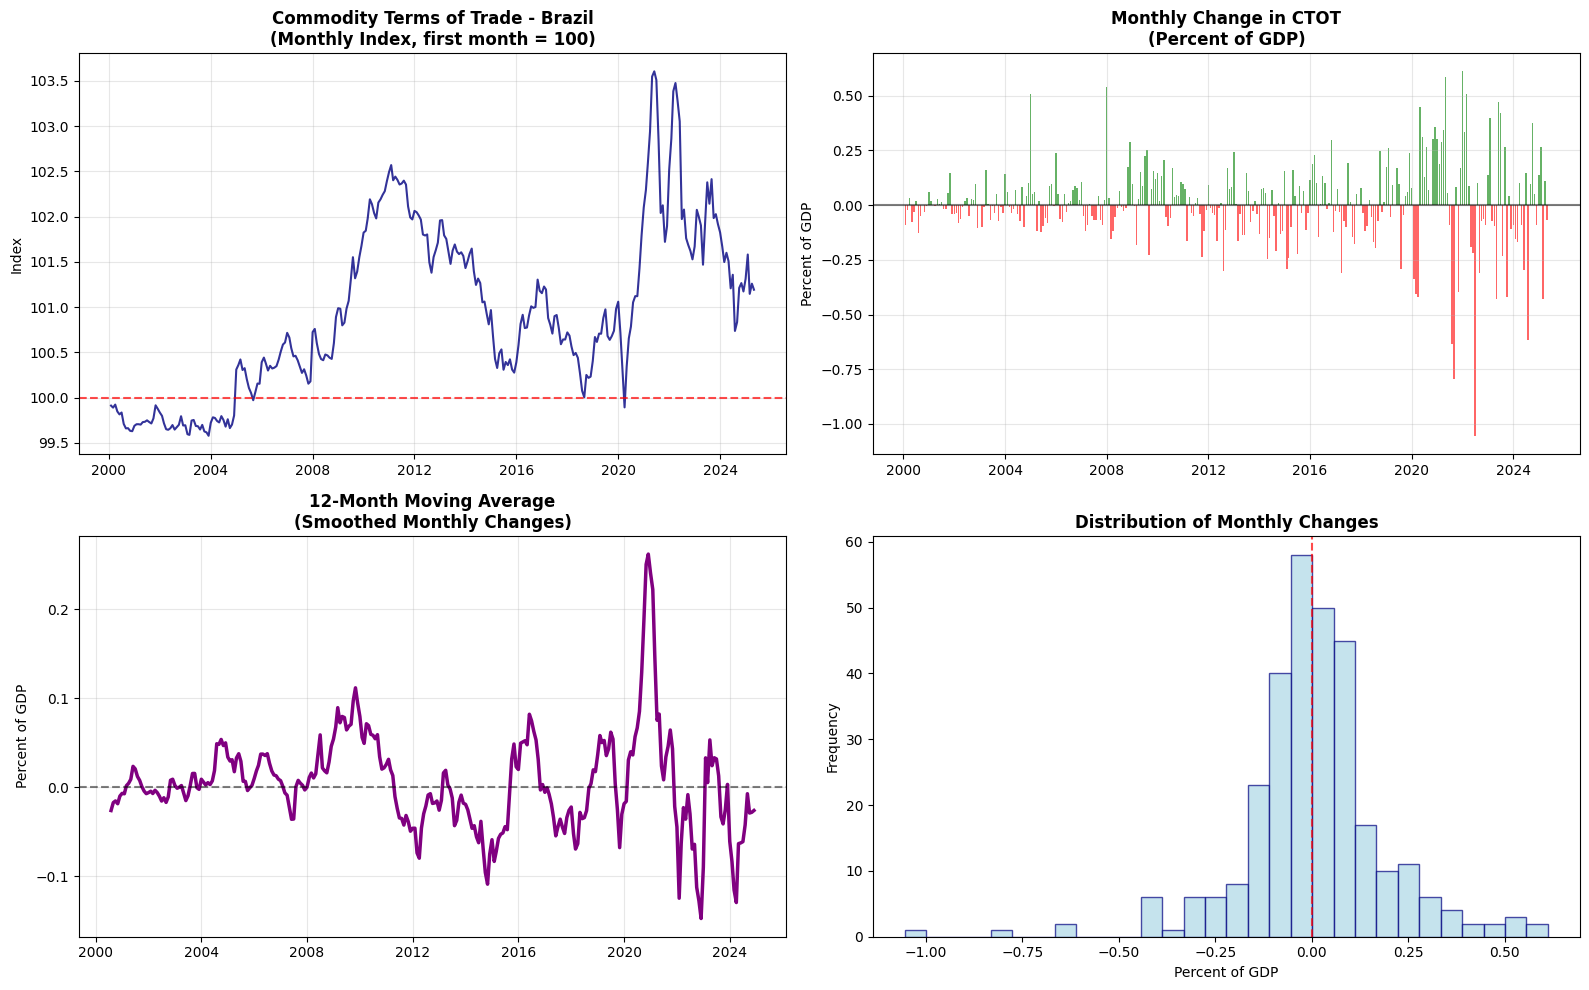


Top 5 commodities por peso promedio absoluto:
  PIORECR: 0.012524
  PSOIL: 0.007957
  PCOFFOTM: 0.004355
  PSOMEAL: 0.003213
  PSUGAISA: 0.003183


In [3]:
country_code='76'

def get_historical_trade_data(subscription_key, country_code = country_code, years=None):
    """
    Obtiene datos históricos de comercio para múltiples años
    """
    if years is None:
        # Últimos 5 años como ejemplo
        years = list(map(str, range(1997, 2025)))  # 2000 a 2024
    
    all_data = []

    for year in years:
        print(f"Obteniendo datos para {year}...")
        try:
            year_data = comtradeapicall.getFinalData(
                subscription_key, 
                typeCode='C', 
                freqCode='A',  # ANUAL, no mensual
                clCode='HS', 
                period=year,
                reporterCode=country_code, 
                cmdCode=None, 
                flowCode=None,  # Tanto imports como exports
                partnerCode=0,
                partner2Code=None,
                maxRecords=50000, 
                format_output='JSON',
                includeDesc=True,
                customsCode=None, 
                motCode=None,
                aggregateBy=None, 
                breakdownMode='classic', 
                countOnly=None
            )
            
            # Filtrar solo 6-digit codes
            year_data_filtered = year_data[year_data['aggrLevel'] == 6].copy()
            year_data_filtered['year'] = int(year)
            
            all_data.append(year_data_filtered)
            print(f"  {len(year_data_filtered)} registros obtenidos")
            
        except Exception as e:
            print(f"Error obteniendo datos para {year}: {e}")
            continue
    
    if all_data:
        combined_data = pd.concat(all_data, ignore_index=True)
        print(f"Total datos históricos: {len(combined_data)} registros")
        return combined_data
    else:
        print("No se pudieron obtener datos históricos")
        return pd.DataFrame()

#PASO 1: Obtener datos de inflación de la OCDE para G7
def get_oecd_cpi_data():
    url = "https://sdmx.oecd.org/public/rest/data/OECD.SDD.TPS,DSD_PRICES@DF_PRICES_ALL,1.0/G7.M.N.CPI.IX._T.N.GY+_Z?startPeriod=1999-01&endPeriod=2025-05"
    
    response = requests.get(url)
    print(f"Status: {response.status_code}")
    
    if response.status_code == 200:
        root = ET.fromstring(response.content)
        
        namespaces = {
            'message': 'http://www.sdmx.org/resources/sdmxml/schemas/v2_1/message',
            'generic': 'http://www.sdmx.org/resources/sdmxml/schemas/v2_1/data/generic'
        }
        
        data = []
        for obs in root.findall('.//generic:Obs', namespaces):
            time_elem = obs.find('generic:ObsDimension[@id="TIME_PERIOD"]', namespaces)
            value_elem = obs.find('generic:ObsValue', namespaces)
            
            if time_elem is not None and value_elem is not None:
                period = time_elem.get('value')
                value = float(value_elem.get('value'))
                data.append({'date': period, 'cpi_g7': value})
        
        df = pd.DataFrame(data)
        df['date'] = pd.to_datetime(df['date'])
        df = df.set_index('date')
        
        # ¡ORDENAR EL ÍNDICE!
        df = df.sort_index()
        
        print(f"Datos extraídos: {len(df)} observaciones")
        print(f"Período: {df.index.min()} a {df.index.max()}")
        print("\nPrimeras 5 observaciones:")
        print(df.head())
        print("\nÚltimas 5 observaciones:")
        print(df.tail())
        
        return df
    
    else:
        print(f"Error: {response.status_code}")
        return None

# Ejecutar
cpi_g7 = get_oecd_cpi_data()
def prepare_cpi_deflator(cpi_g7):
        """Convierte CPI G7 de base 2015=100 a base 2016=100"""
        # Tu CPI viene en base 2015=100, convertir a 2016=100
        cpi_2016_avg = cpi_g7.loc[cpi_g7.index.year == 2016, 'cpi_g7'].mean()
        conversion_factor = 100 / cpi_2016_avg
        cpi_2016_base = cpi_g7['cpi_g7'] * conversion_factor
        
        print(f"CPI G7 convertido a base 2016=100:")
        print(f"  Valor en 2016: {(cpi_2016_avg * conversion_factor):.2f}")
        print(f"  Valor actual: {cpi_2016_base.iloc[-1]:.2f}")
        
        return cpi_2016_base
cpi_deflator = prepare_cpi_deflator(cpi_g7)

# PASO 2: Obtener datos históricos (múltiples años)
print("Obteniendo datos históricos de comercio...")

# Función para obtener datos de múltiples años
historical_trade = get_historical_trade_data(
    subscription_key=subscription_key,
    country_code= country_code,  # Brasil
    years = list(map(str, range(1997, 2025)))  # 2000 a 2024
)


# PASO 3: Calcular CTOT mensual estilo WP/19/21
# Usar la nueva función mensual
monthly_results, monthly_weights, annual_weights = calculate_monthly_ctot_wp1921(
    imf_file_path=r"C:\Users\Usuario\Documents\Github\Talvi\data\external-data.xls",
    trade_df=historical_trade,
    country_code='76',
    country_name='Brazil',
    gdp_dict=gdp_brazil,
    cpi_deflator=cpi_deflator  # NUEVO parámetro opcional
)

In [4]:
monthly_results.to_csv('../data/indicadores/monthly_results_brazil.csv', sep=";")